In [22]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#read in csv file
raw_eqk = pd.read_csv("https://raw.githubusercontent.com/carmengg/eds220-hwk-1/main/data/earthquake_data.csv")

In [6]:
raw_eqk.head()

,time,latitude,longitude,depth,mag,id,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ak11155107,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,nn00436847,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ak11151142,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ak11151135,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ci37171541,"10km WNW of Progreso, Mexico",earthquake


In [7]:
raw_eqk.dtypes

time          object
latitude     float64
longitude    float64
depth        float64
mag          float64
id            object
place         object
type          object
dtype: object

In [11]:
raw_eqk.nunique()

time         120067
latitude      77825
longitude     84467
depth         15514
mag             502
id           120108
place         45395
type             11
dtype: int64

In [15]:
raw_eqk.type.unique()

array(['earthquake', 'quarry blast', 'quarry', 'mining explosion',
       'rock burst', 'explosion', 'landslide', 'sonicboom', 'sonic boom',
       'anthropogenic event', 'acoustic noise'], dtype=object)

In [19]:
eqk = raw_eqk[ (raw_eqk['type']=='earthquake') & (raw_eqk['mag']>=6.5)]

In [44]:
eqk

,time,latitude,longitude,depth,mag,id,place,type,geometry
9062,2014-01-01 16:03:29.000,-13.8633,167.2490,187.00,6.5,usc000lvb5,"32km W of Sola, Vanuatu",earthquake,POINT (167.24900 -13.86330)
12142,2014-02-18 09:27:13.120,14.6682,-58.9272,14.83,6.5,usc000mskt,"172km NNE of Bathsheba, Barbados",earthquake,POINT (-58.92720 14.66820)
14025,2014-02-12 09:19:49.060,35.9053,82.5864,10.00,6.9,usc000mnvj,"272km ESE of Hotan, China",earthquake,POINT (82.58640 35.90530)
15979,2014-02-07 08:40:13.550,-15.0691,167.3721,122.00,6.5,usc000mjye,"34km E of Port-Olry, Vanuatu",earthquake,POINT (167.37210 -15.06910)
17606,2014-02-02 09:26:37.820,-32.9076,-177.8806,44.26,6.5,usc000mfm0,"189km SSE of L'Esperance Rock, New Zealand",earthquake,POINT (-177.88060 -32.90760)
22968,2014-03-16 21:16:29.600,-19.9807,-70.7022,20.00,6.7,usc000ndnj,"64km WNW of Iquique, Chile",earthquake,POINT (-70.70220 -19.98070)
24887,2014-03-10 05:18:13.400,40.8287,-125.1338,16.60,6.8,nc72182046,"78km WNW of Ferndale, California",earthquake,POINT (-125.13380 40.82870)
26972,2014-03-02 20:11:23.430,27.4312,127.3674,119.00,6.5,usb000mzmn,"111km NNW of Nago, Japan",earthquake,POINT (127.36740 27.43120)
29890,2014-04-24 03:10:10.150,49.6388,-127.7316,10.00,6.5,usb000px6r,"120km S of Port Hardy, Canada",earthquake,POINT (-127.73160 49.63880)
31496,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,usb000pr89,"70km SW of Panguna, Papua New Guinea",earthquake,POINT (155.02410 -6.75470)


In [24]:
eqk = gpd.GeoDataFrame(eqk, # data
                                    # specify geometry column
                                    geometry=gpd.points_from_xy(eqk.longitude, 
                                             eqk.latitude),
                                    # specify CRS
                                    crs='WGS84'
                    )

<AxesSubplot:>

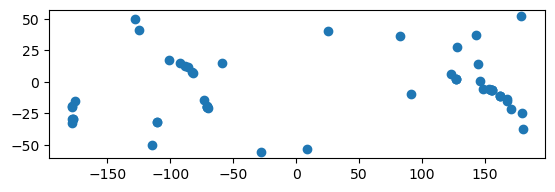

In [29]:
eqk.plot()

In [30]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
worldmap

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


TypeError: __init__() got an unexpected keyword argument 'loc'

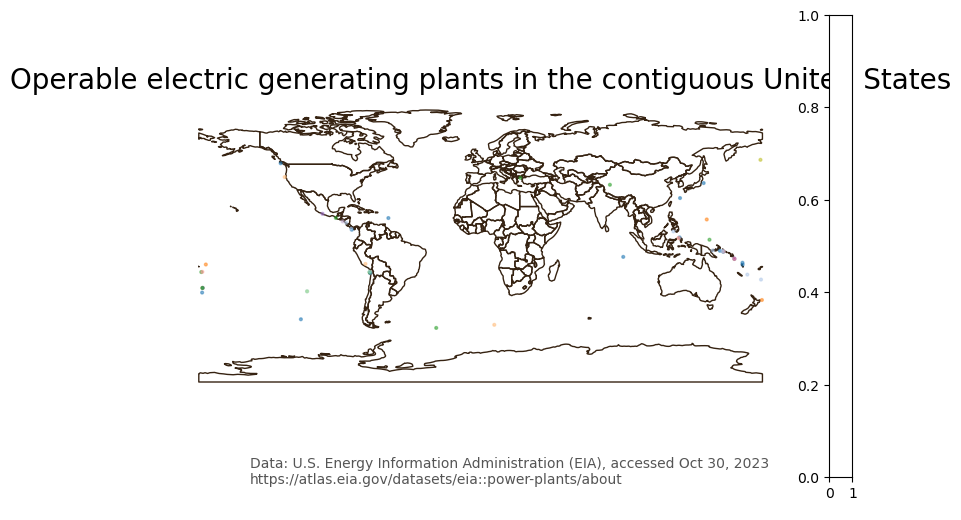

In [33]:
# figsize updates the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# --------------------------
# remove the axis box around the map
ax.axis('off')

# update title
ax.set_title('Operable electric generating plants in the contiguous United States',
fontsize=20)

# annotate the data source
ax.annotate("Data: U.S. Energy Information Administration (EIA), accessed Oct 30, 2023 \nhttps://atlas.eia.gov/datasets/eia::power-plants/about", 
            xy=(0.25, .06), # position
            xycoords='figure fraction', 
            fontsize=10, 
            color='#555555')

# --------------------------
# add states 
worldmap.plot(ax=ax,
               color='none',
               edgecolor = '#362312')

# add electric power plants colored by energy source
eqk.plot(ax=ax, 
                  column='mag',
                  legend=True,
                  markersize = 4,
                  cmap='tab20',
                  alpha=0.5,
                  # adjust legend
                  legend_kwds={'loc': "lower right", 
                                'title':'Primary energy source',
                                'title_fontsize':'small', 
                                'fontsize':'small'})

<AxesSubplot:title={'center':'Earthquakes of Mag equal or greater than 6.5 in 2014'}>

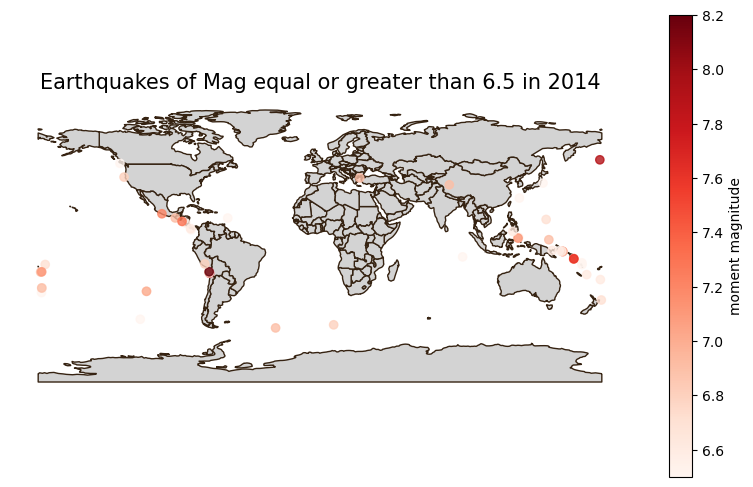

In [53]:
# figsize updates the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# remove the axis box around the map
ax.axis('off')

# update title
ax.set_title('Earthquakes of Mag equal or greater than 6.5 in 2014',
fontsize=15)

# add worldmap
worldmap.plot(ax=ax,
               color='lightgrey',
               edgecolor = '#362312')

# add electric power plants colored by energy source
eqk.plot(ax=ax, 
                  column='mag',
                  legend=True,
                  cmap='Reds',
                  alpha=0.8,
        legend_kwds={'label':'moment magnitude'})